# **Business Problem Understanding**

### **Context**

Sebuah Perusahaan yang bergerak di bidang Telekomunikasi menghadapi tantangan dalam mempertahankan pelanggan karena tingkat churn yang tinggi. Perusahaan ingin memprediksi pelanggan mana saja yang akan berhenti menggunakan layanan dan pelanggan mana saja yang akan melanjutkan menggunakan layanan.

`Model prediktif akan digunakan oleh tim pemasaran untuk mengidentifikasi pelanggan mana saja yang berisiko tinggi churn sehingga mereka dapat mengambil tindakan pencegahan/retensi pada pelanggan tersebut.`

**Churn**
- No / 0: pelanggan melanjutkan menggunakan layanan
- Yes / 1: pelanggan berhenti menggunakan layanan

### **Probelm Statement**

Perusahaan mengalami kerugian yang disebabkan oleh customer churn atau pelanggan yang berhenti menggunakan layanan. ada banyak sekali dampak bagi perusahaan, salah satunya adalah dampak finansial.

Customer churn dapat dicegah dengan beberapa cara, salah satunya adalah dengan memprediksi pelanggan yang berpotensi churn dimasa depan. Tapi, Perusahaan belum mampu memprediksi secara akurat peluang pelanggan untuk churn. Hal ini berdampak negatif pada pendapatan dan pertumbuhan bisnis.

### **Goals**

Berdasarkan permasalahan tersebut, perusahaan ingin memprediksi secara akurat peluang pelanggan untuk churn agar perusahaan dapat memberikan dapat mengambil langkah preventif yang efektif untuk meningkatkan retensi pelanggan. Kita akan membuatkan model yang tepat untuk memprediksi pelanggan yang akan Churn. 

perusahaan juga ingin mengetahui apa saja faktor-faktor yang menyebabkan pelanggan berhenti menggunakan layanan mereka agar perusahaan dapat mengidentifikasi masalah utama dan melakukan perbaikan yang diperlukan untuk memenuhi kebutuhan serta harapan pelanggan secara lebih baik.

### **Analytic Approach**

Jadi yang akan kita lakukan adalah menganalisis data untuk menemukan pola yang membedakan pelanggan yang churn/berhenti menggunakan layanan atau tidak.

yang akan dilakukan adalah membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi peluang seorang pelanggan akan churn atau tidak

### **Metric Evaluation**

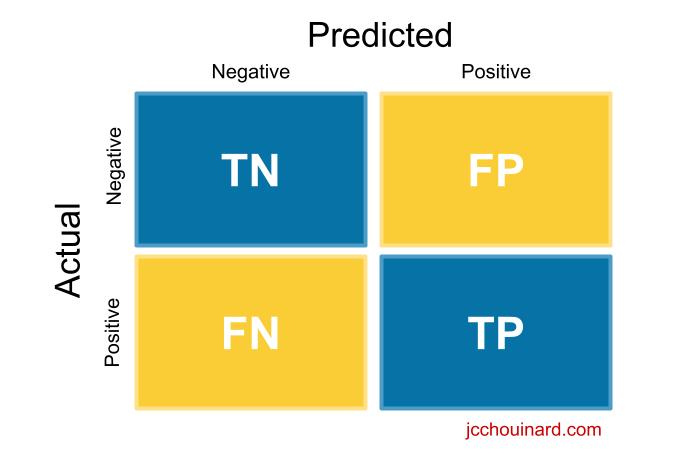

1. True Positive (TP) : Prediksi Pelanggan Churn padahal Aktualnya Churn
2. True Negative (TN) : Prediksi Pelanggan No Churn padahal Aktualnya No Churn
3. False Positive (FP) : Prediksi Pelanggan Churn padahal Aktualnya No Churn
4. False Negative (FN) : Prediksi Pelanggan No Churn padahal Aktualnya Churn

Berdasarkan interpretasi diatas, diketahui ada 2 Error/Kesalahan yang akan terjadi, yang dapat merugikan perusahaan

- Type 1 error : False Positive (FP), prediksi pelanggan Churn padahal aktualnya No Churn
- Konsekuensi: Perusahaan memberikan upaya pencegahan churn yang tidak perlu yang dapat menambah biaya operasional tanpa memberikan keuntungan langsung.

- Type 2 error : False Negative (FN), prediksi pelanggan No Churn padahal aktualnya Churn
- Konsekuensi: Pelanggan akan churn tanpa adanya tindakan pencegahan, yang berpotensi menyebabkan kehilangan pendapatan langsung.

Berdasarkan konsekuensinya, FN memberikan dampak yang lebih merugikan dibanding FP. oleh karena itu, meskipun kami ingin meminimalkan kedua jenis kesalahan tersebut, kami menempatkan prioritas yang lebih tinggi terhadap pencegahan terhadap pelanggan yang diprediksi akan churn untuk meminimalisir kerugian. Maka, metric utama yang akan kita gunakan adalah `Recall` karena recall Memastikan model mampu mendeteksi sebanyak mungkin pelanggan yang benar-benar churn, meskipun dengan risiko lebih banyak FP.

In [178]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data splitting
from sklearn.model_selection import train_test_split

# Library preprocessing
from sklearn.compose import ColumnTransformer

# from imblearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline

# Library untuk missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Library untuk scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder

# Cross Validation 
from sklearn.model_selection import cross_val_score

# Modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Metric Evaluation
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

## **Informasi kolom**

| Kolom | Data Type | Deskripsi |
| --- | --- | --- |
| Dependents | String | Apakah pelanggan memiliki tanggungan atau tidak |
| Tenure | Integer | Lama waktu (dalam bulan) pelanggan telah menggunakan layanan |
| OnlineSecurity | String | Apakah pelanggan memiliki keamanan online atau tidak |
| OnlineBackup | String | Apakah pelanggan memiliki cadangan online atau tidak |
| InternetService | String | layanan Internet yang digunakan pelanggan |
| DeviceProtection | String | Apakah klien memiliki perlindungan perangkat atau tidak |
| TechSupport | String | Apakah klien memiliki dukungan teknis atau tidak |
| Contract | String | Jenis kontrak berdasarkan durasinya |
| PaperlessBilling | String | Apakah tagihan dilakukan tanpa kertas |
| MonthlyCharges | Float | Jumlah biaya layanan setiap bulannya |
| Churn | String | Status pelanggan Apakah berhenti menggunakan layanan atau tidak |

In [179]:
df = pd.read_csv('data_telco_customer_churn.csv')
df

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No
...,...,...,...,...,...,...,...,...,...,...,...
4925,No,15,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,103.45,No
4926,Yes,10,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,91.10,No
4927,No,58,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.75,No
4928,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.75,Yes


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


In [181]:
display(df.describe(include=object), df.describe())

,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,Churn
count,4930,4930,4930,4930,4930,4930,4930,4930,4930
unique,2,3,3,3,3,3,3,2,2
top,No,No,No,Fiber optic,No,No,Month-to-month,Yes,No
freq,3446,2445,2172,2172,2186,2467,2721,2957,3614


,tenure,MonthlyCharges
count,4930.000000,4930.000000
mean,32.401217,64.883032
std,24.501193,29.923960
min,0.000000,18.800000
25%,9.000000,37.050000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.650000


In [182]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Dependents,object,0,0.0,2,"[No, Yes]"
1,tenure,int64,0,0.0,73,"[11, 10]"
2,OnlineSecurity,object,0,0.0,3,"[Yes, No]"
3,OnlineBackup,object,0,0.0,3,"[Yes, No]"
4,InternetService,object,0,0.0,3,"[DSL, No]"
5,DeviceProtection,object,0,0.0,3,"[No internet service, Yes]"
6,TechSupport,object,0,0.0,3,"[Yes, No]"
7,Contract,object,0,0.0,3,"[Month-to-month, Two year]"
8,PaperlessBilling,object,0,0.0,2,"[No, Yes]"
9,MonthlyCharges,float64,0,0.0,1422,"[19.85, 39.4]"


- Dataset ini terdiri dari 4930 baris dan 11 kolom, yang dimana 10 kolom akan digunakan sebagai fitur dan kolom untuk target yakni Churn
- Dataset ini Tidak memiliki missing value pada dataset ini.
- Dataset ini memiliki 2 kolom data bertipe numerik yaitu tenure dan MonthlyCharges kolom-kolom ini akan dilakukan scaling.
- Pada data bertipe kategorik seperti Dependents, OnlineSecurity, OnlineBackup, InternetService, DeviceProtection, TechSupport, PaperlessBilling akan dilakukan encoding.

Pada penjelasan diatas, tidak ada kolom yang akan kita drop karena melihat kemungkinan setiap data dapat berguna dalam pembuatan model machine learning nantinya.

# **Data Cleaning**

## **Hapus Baris Duplikat**

In [183]:
df.duplicated().sum()

np.int64(77)

Dalam dataset ini terdapat 77 data duplikat. Data Tersebut akan kita hapus karena akan mengganggu model machine learning kita.

In [184]:
df.drop_duplicates(inplace=True)

In [185]:
df.shape

(4853, 11)

## **Mengubah Data Churn**

In [186]:
df['Churn'].value_counts()

Churn
No     3565
Yes    1288
Name: count, dtype: int64

In [187]:
df['Churn'] = np.where(df['Churn'] == 'Yes', 1, 0)

Nilai di kolom Churn perlu diubah dari Yes dan No menjadi 1 dan 0. karena sebagian besar model machine learning hanya dapat bekerja dengan data numerik. Jadi untuk menghindari error, kita akan mengubah nilai Yes dan No menjadi 1 dan 0

ok sekarang data yang kita miliki sudah bersih, mari sekarang kita lanjut ke tahap Analisa Datanya untuk keperluan masalah kita.

# **Data Analyst**

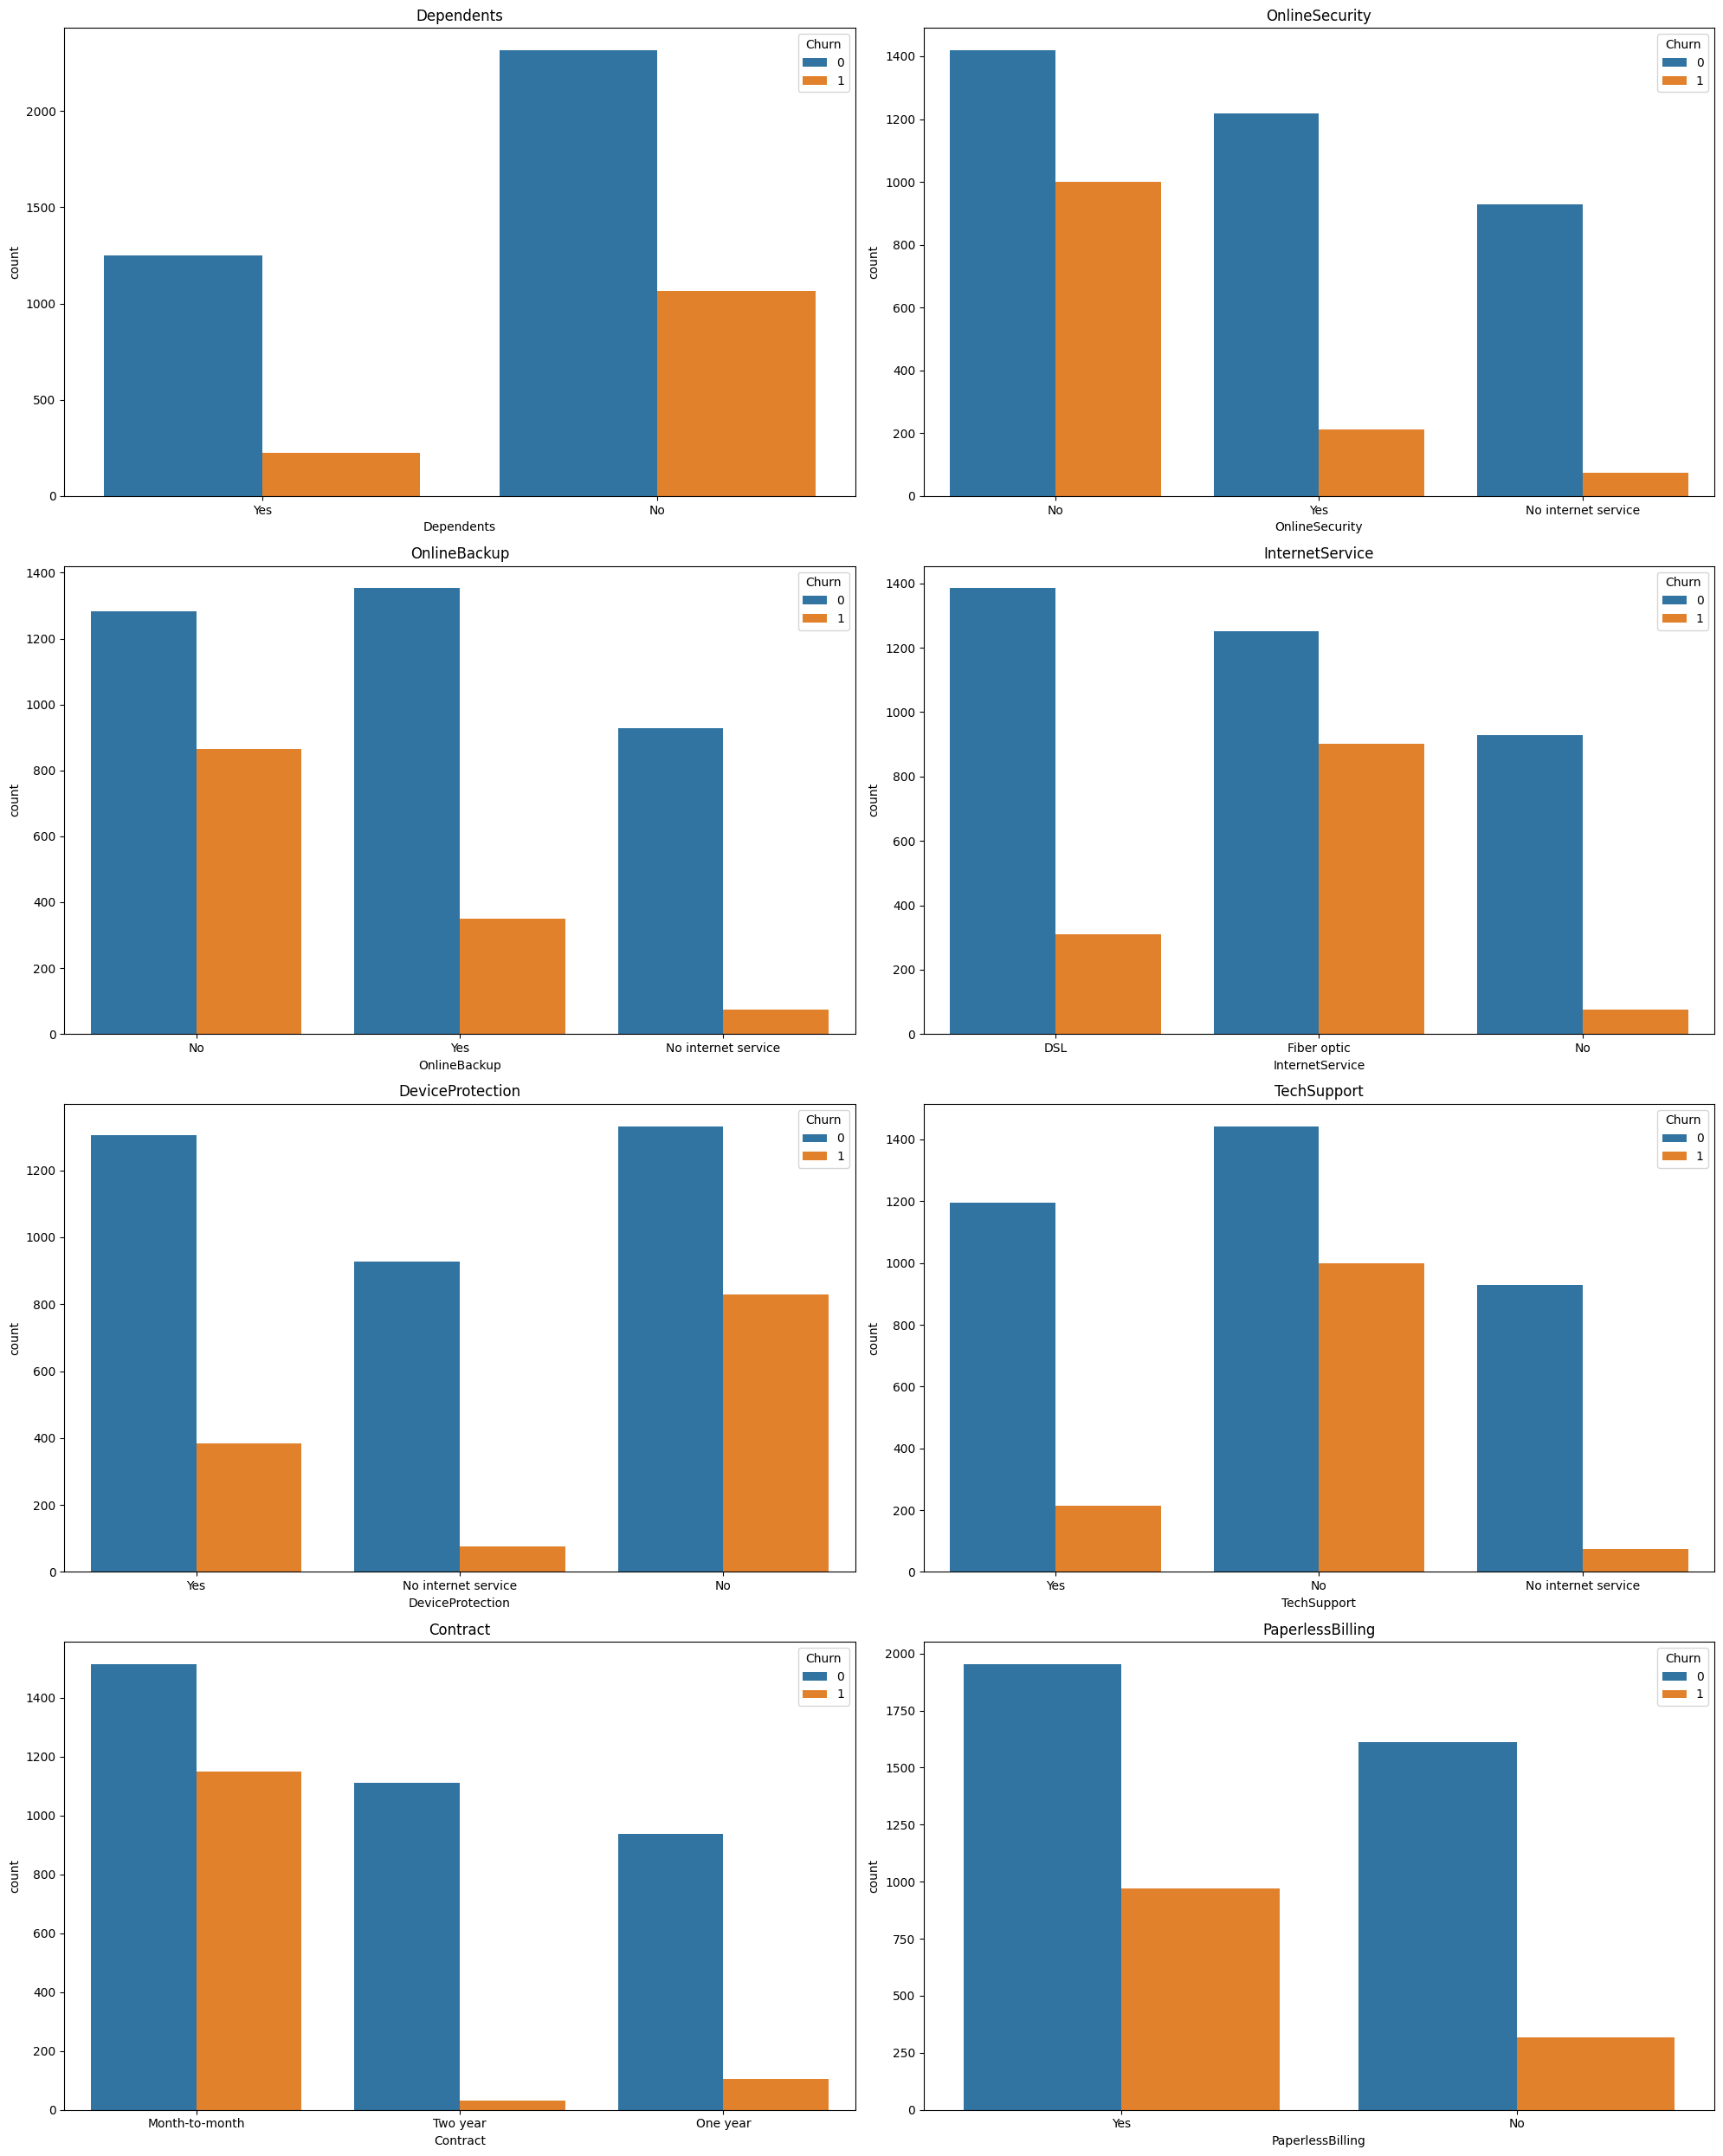

In [188]:
plt.figure(figsize=(20, 25))

col_num = []
for i in df.columns:
    if (df[i].dtype == "object"):
        col_num.append(i)

for i, col in enumerate(col_num):
    plt.subplot((len(col_num) // 2) + (len(col_num) % 2), 2, i+1)
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(col)

plt.tight_layout()
plt.show()

In [189]:
for i in df.drop(columns=['tenure','MonthlyCharges','Churn']).columns:
    df_churn_presentage = df.groupby(i)['Churn'].value_counts(normalize=True).unstack()
    display(df_churn_presentage.sort_values(1, ascending=False))

Churn,0,1
Dependents,,
No,0.685207,0.314793
Yes,0.847929,0.152071


Churn,0,1
OnlineSecurity,,
No,0.586364,0.413636
Yes,0.851748,0.148252
No internet service,0.925224,0.074776


Churn,0,1
OnlineBackup,,
No,0.597765,0.402235
Yes,0.794947,0.205053
No internet service,0.925224,0.074776


Churn,0,1
InternetService,,
Fiber optic,0.581244,0.418756
DSL,0.816627,0.183373
No,0.925224,0.074776


Churn,0,1
DeviceProtection,,
No,0.616096,0.383904
Yes,0.773104,0.226896
No internet service,0.925224,0.074776


Churn,0,1
TechSupport,,
No,0.590909,0.409091
Yes,0.848011,0.151989
No internet service,0.925224,0.074776


Churn,0,1
Contract,,
Month-to-month,0.568480,0.431520
One year,0.898565,0.101435
Two year,0.972003,0.027997


Churn,0,1
PaperlessBilling,,
Yes,0.668034,0.331966
No,0.835581,0.164419


Berdasarkan barplot diatas dan tabel-tabel diatas kita dapat menyimpulkan beberapa hal :
1. Pelanggan yang tidak memiliki tanggungan (`Dependents = No`) lebih cenderung churn dibandingkan Pelanggan yang memiliki tanggungan (`Dependents = Yes`)
2. Pelanggan yang tidak memiliki keamanan online (`OnlineSecurity = No`) lebih cenderung churn dibandingkan Pelanggan yang memiliki `OnlineSecurity` yang lain.
3. Pelanggan yang tidak memiliki cadangan online (`OnlineBackup = No`) lebih cenderung churn dibandingkan Pelanggan yang memiliki `OnlineBackup` yang lain.
4. Pelanggan yang menggunakan layanan fiber optic (`InternetService = Fiber optic`) lebih cenderung churn dibandingkan Pelanggan yang menggunakan `InternetService` yang lain.
5. Pelanggan yang tidak memiliki pelindung perangkat (`DeviceProtection = No`) lebih cenderung churn dibandingkan Pelanggan yang memiliki `DeviceProtection` yang lain.
6. Pelanggan yang tidak memiliki dukungan teknis (`TechSupport = No`) lebih cenderung churn dibandingkan Pelanggan yang memiliki `TechSupport` yang lain.
7. Pelanggan yang durasi kontraknya bulan ke bulan (`Contract = Month-to-month`) lebih cenderung churn dibandingkan Pelanggan yang memiliki `Contract` yang lain.
8. Pelanggan yang tagihan nya tidak menggunakan kertas (`PaperlessBilling = Yes`) lebih cenderung churn dibandingkan Pelanggan yang memiliki `PaperlessBilling` yang lain.

## **Outlier**

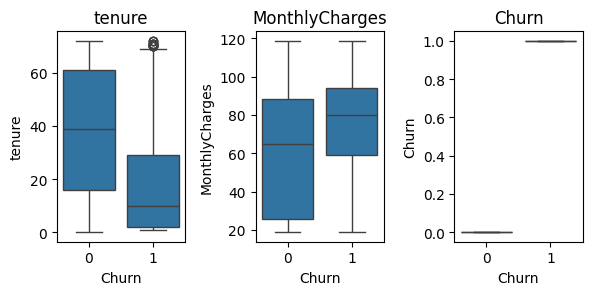

In [190]:
plt.figure(figsize=(10, 8))

col_num = []
for i in df.columns:
    if (df[i].dtype == "float64") | (df[i].dtype == 'int64'):
        col_num.append(i)

for i, col in enumerate(col_num):
    plt.subplot((len(col_num) // 5) + (len(col_num) % 5), 5, i+1)
    sns.boxplot(data=df, x='Churn', y=col)
    plt.title(col)

plt.tight_layout()
plt.show()

jika dilihat mengguankan Boxplot, pada kolom `tenure` terdapat outlier pada kelas 1 atau churn. sementara untuk `MonthlyCharges`, dan Churn ini tidak memiliki outlier di kelas 0 atau 1.

## **Distribution**

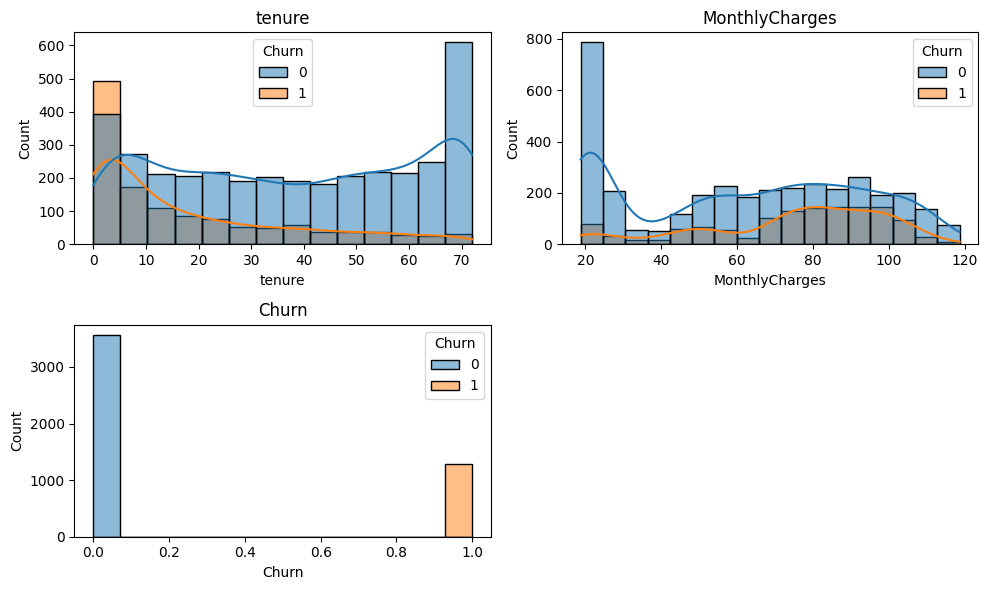

In [191]:
plt.figure(figsize=(10, 6))

col_num = []
for i in df.columns:
    if (df[i].dtype == "float64") | (df[i].dtype == 'int64'):
        col_num.append(i)

for i, col in enumerate(col_num):
    plt.subplot((len(col_num) // 2) + (len(col_num) % 2), 2, i+1)
    sns.histplot(data=df, x=col, hue='Churn', kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

Berdasarkan histogram diatas kita dapat menyimpulkan:
1. terlihat perbedaan distribusi pada kolom `tenure` antara yang churn dan tidak. Untuk distribusi pelanggan yang churn,Semakin sedikit `tenure` maka pelanggan cenderung berhenti menggunakan layanan/churn, sedangkan distribusi pelanggan yang tidak churn cenderung lebih stabil.
2. Untuk distribusi kolom `MonthlyCharges` kurang lebih sama antara target 0 dan 1. Dimana berarti kemungkinan `MonthlyCharges`ini tidak mempengaruhi pelanggan untuk churn atau tidak.

In [192]:
distribusi_churn = df['Churn'].value_counts(normalize=True) * 100
distribusi_churn

Churn
0    73.459716
1    26.540284
Name: proportion, dtype: float64

Dari hasil tersebut dapat disimpulkan bahwa untuk kolom churn distribusi churn dan tidak churn nya 1:4. Ini juga menandakan bahwa data ini `tidak terditribusi normal/imbalace`

## **Correlation**

<Axes: >

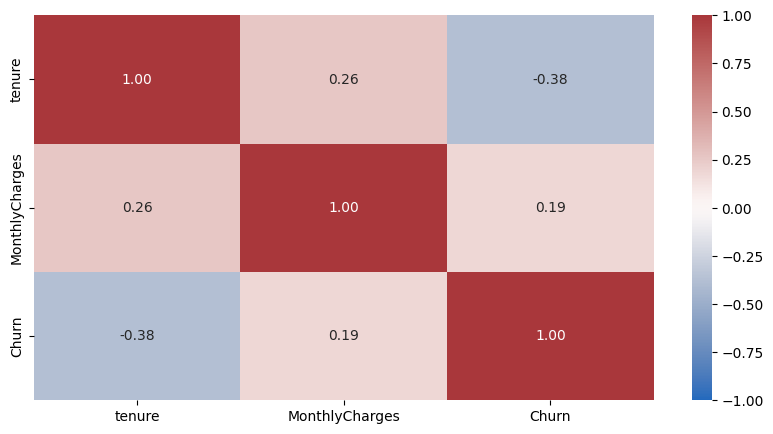

In [193]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr('spearman', numeric_only=True), annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='vlag')

dari heatmap ini kita bisa simpulkan bahwa kolom `tenure` dan `MonthlyCharges` memiliki korelasi yang tidak begitu kuat dengan kolom `Churn`.

# Define X & y

| Atribut | Nama Kolom | Alasan |
| --- | --- | --- |
| Fitur/X | Dependents, OnlineSecurity, OnlineBackup, InternetService, DeviceProtection, TechSupport, PaperlessBilling, Contract, tenure, MonthlyCharges | karena fitur-fitur ini dapat mempengaruhi pelanggan untuk churn atau tidak. |
| Target/Y | Churn | karena kolom ini menunjukan status apakah pelanggan churn atau tidak |

In [194]:
X = df.drop(columns='Churn')
y = df['Churn']

In [195]:
X

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60
...,...,...,...,...,...,...,...,...,...,...
4925,No,15,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,103.45
4926,Yes,10,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,91.10
4927,No,58,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.75
4928,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.75


# Splitting

In [196]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 0,
    stratify = y
)

# Preprocessing

Sekarang mari kita melakukan fitur encoding untuk fitur2 categorical dan scaling untuk fitur2 numerical yang kita miliki.
Yang akan kita lakukan adalah :

| Preprocessing | Method | Kolom | Alasan |
| --- | --- | --- | --- |
| Encoding | One Hot | Dependents, OnlineSecurity, OnlineBackup, InternetService, DeviceProtection, TechSupport, PaperlessBilling | karena dalam fitur-fitur ini datanya berupa yes/no/no internet service dan Fiber optic/DSL/No yang berarti fitur ini tidak memiliki urutan/ordinal. |
|   | Ordinal | Contract | karena fitur ini memiliki urutan dari lamanya durasi kontrak, dimana pelanggan dengan kontrak Two year cenderung lebih loyal daripada yang memilih Month-to-month. Month-to-month akan kita rubah menjadi 3 , One year kita rubah menjadi 2, dan Two year akan kita rubah menjadi 1. Urutan tersebut berdasarkan tingkat keloyalan |
|  | Binary |  | |
| Scaling | Min Max Scaler |  |
|  | Robust Scaler | tenure, MonthlyCharges | karena robust scaling lebih tahan terhadap outlier dan distribusi tidak normal |
|  | Standard Scaler |  |


In [197]:
ordinal_encoding = [{
    "col": "Contract",
    "mapping": {'Month-to-month': 3,
                'One year': 2,
                'Two year': 1}
}]

In [198]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ["Dependents", 'OnlineSecurity', 'OnlineBackup', 
                                 'InternetService', 'DeviceProtection', 'TechSupport', 'PaperlessBilling']),
    ('ordinal', OrdinalEncoder(cols=["Contract"], mapping=ordinal_encoding), ["Contract"]),
    ('pipe_line', RobustScaler(), ['tenure', 'MonthlyCharges'])
], remainder='passthrough')

In [199]:
# fitting
transformer.fit(X_train)

# transform
X_train_prep = transformer.transform(X_train)
X_test_prep = transformer.transform(X_test)

In [200]:
encoding_scaling_result = pd.DataFrame(transformer.fit_transform(X_train),columns=transformer.get_feature_names_out())
encoding_scaling_result

,onehot__Dependents_Yes,onehot__OnlineSecurity_No internet service,onehot__OnlineSecurity_Yes,onehot__OnlineBackup_No internet service,onehot__OnlineBackup_Yes,onehot__InternetService_Fiber optic,onehot__InternetService_No,onehot__DeviceProtection_No internet service,onehot__DeviceProtection_Yes,onehot__TechSupport_No internet service,onehot__TechSupport_Yes,onehot__PaperlessBilling_Yes,ordinal__Contract,pipe_line__tenure,pipe_line__MonthlyCharges
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.808511,-0.398090
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.893617,0.295552
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,3.0,-0.297872,-0.892687
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.042553,0.375974
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.148936,0.268409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3877,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,0.276596,-1.024378
3878,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,-0.234043,-0.420206
3879,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,-0.489362,-0.313647
3880,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,-0.510638,0.188992


ini adalah hasil dari One Hot Encoding yaitu nilai 1/0, hail dari Ordinal 1-3, dan hasil dari Robust Scaler

# **Cross-Validation**

Beberapa model yang akan kita evaluasi untuk mencari model utama adalah:

| NO | Model | Deskripsi |
| --- | --- | --- |
| 1. | Logistic Regression | Regresi logistik merupakan teknik analisis data yang menggunakan matematika untuk menemukan hubungan antara dua faktor data. Kemudian menggunakan hubungan ini untuk memprediksi nilai dari salah satu faktor tersebut berdasarkan faktor yang lain. Prediksi biasanya memiliki jumlah hasil yang terbatas, seperti ya atau tidak. |
| 2. | Decision Tree | Decision Tree merupakan salah satu algoritma Machine Learning yang cara kerjanya membangun model prediksi dengan membagi data ke dalam subset yang lebih kecil berdasarkan kondisi tertentu. Struktur model ini berbentuk pohon, dengan root node (akar) di bagian atas, branches (ranting) di bagian tengah, dan daun di bagian bawah yang mewakili hasil keputusan (output) |
| 3. | KNearest Neighbors | KNearest Neighbors merupakan salah satu algoritma Machine Learning yang memanfaatkan data terdekat untuk melakukan prediksi pada data baru yang belum dikenal (data train). Algoritme ini bekerja dengan cara mencari sejumlah tetangga terdekat dari data train dan menentukan kelas data train tersebut berdasarkan mayoritas kelas dari tetangga terdekat (data train) yang ditemukan |
| 4. | XGBoost | Extreme Gradient Boosting merupakan algoritma Machine Learning berbasis Decision Tree yang dirancang untuk memberikan performa tinggi dan efisiensi komputasi. Algoritma ini adalah salah satu implementasi dari teknik gradient boosting, yang menggabungkan banyak model Decision Tree yang lemah (weak learners) secara iteratif untuk membentuk model yang lebih kuat |
| 5. | LGBM | Light Gradient Boosting Machine adalah algoritma Machine Learning berbasis gradient boosting yang dirancang untuk efisiensi tinggi dan performa yang baik, terutama pada dataset besar dan berdimensi tinggi. LightGBM menggunakan metode pertumbuhan leaf-wise (berbasis daun) dibandingkan dengan level-wise (berbasis tingkat) seperti pada XGBoost. |
| 6. | Random Forest | Random Forest merupakan salah satu algoritma Machine Learning yang cara kerjanya menggabungkan banyak pohon keputusan (decision trees) untuk membuat model yang lebih kuat, stabil, dan akurat. Random Forest bekerja berdasarkan prinsip bagging (bootstrap aggregating), di mana banyak model pohon keputusan (Decision Tree) dilatih secara independen, dan hasil akhirnya adalah agregasi dari semua pohon tersebut. |

Parameter yang digunakan Cross_val_score adalah sebagai berikut:
| Parameter CV | Keterangan |
| --- | --- |
| cv = 5 | jumlah pemisahan validasi silang, disini kita memisahkannya menjadi 5 |
| scoring = recall | Mengurangi jumlah FN dengan resiko menaikan FP  |

In [201]:
# define algo
tree = DecisionTreeClassifier(random_state=0)
knn = KNeighborsClassifier()
logreg = LogisticRegression(random_state=0)
xgboost = XGBClassifier(random_state=0)
lgbm = LGBMClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)

list_algo = [tree, knn, logreg, xgboost, lgbm, rf]

list_all_Score = []
list_mean =[]
list_std = []

for algo in list_algo:
# define algo
    model = algo

#pipeline --> supaya tidak terjadi information leakage
# pipeline -> untuk menggabungkan preprocesing dengan modeling
    Pipe_model = Pipeline([
        ('preprocessing',transformer),
        ('modeling', model)
    ])

#cross validation
    cv_score = cross_val_score(
        estimator = Pipe_model,   
        X = X_train,
        y = y_train,
        scoring = 'recall',
        cv = 5  
)

#recall 
    list_all_Score.append(cv_score.round(2))
    list_mean.append(cv_score.mean())
    list_std.append(cv_score.std())

[LightGBM] [Info] Number of positive: 824, number of negative: 2281
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000735 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 356
[LightGBM] [Info] Number of data points in the train set: 3105, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265378 -> initscore=-1.018199
[LightGBM] [Info] Start training from score -1.018199
[LightGBM] [Info] Number of positive: 824, number of negative: 2281
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000112 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 356
[LightGBM] [Info] Number of data points in the train set: 3105, number of used features: 15
[LightGBM] [Info] [binary:Bo

In [202]:
# Create an empty DataFrame
df_cv = pd.DataFrame()

# Assign lists to DataFrame columns
df_cv['algo'] = list_algo
df_cv['all_recall'] = list_all_Score
df_cv['mean_recall'] = list_mean
df_cv['std_recall'] = list_std

# Display the DataFrame
df_cv.sort_values('mean_recall', ascending=False)

,algo,all_recall,mean_recall,std_recall
2,LogisticRegression(random_state=0),"[0.53, 0.5, 0.52, 0.57, 0.47]",0.518447,0.032259
3,"XGBClassifier(base_score=None, booster=None, c...","[0.49, 0.49, 0.5, 0.52, 0.52]",0.504854,0.015351
4,LGBMClassifier(random_state=0),"[0.52, 0.49, 0.51, 0.51, 0.48]",0.503883,0.016071
0,DecisionTreeClassifier(random_state=0),"[0.52, 0.47, 0.46, 0.48, 0.5]",0.485437,0.021271
5,RandomForestClassifier(random_state=0),"[0.49, 0.48, 0.47, 0.46, 0.48]",0.474757,0.010366
1,KNeighborsClassifier(),"[0.5, 0.49, 0.49, 0.46, 0.45]",0.473786,0.018826


Model terbaik adalah `LogisticRegression` karena `mean score`-nya paling besar dengan `std score` kecil

# **7. Hyperparameter Tuning**

Logistic Regression adalah model yang relatif sederhana namun sangat efektif untuk klasifikasi. Meskipun Logistic Regression tidak memiliki banyak parameter seperti model yang lebih kompleks (misalnya, Random Forest atau XGBoost), ada beberapa parameter yang dapat di-tuning untuk meningkatkan performanya, terutama ketika digunakan pada dataset yang kompleks atau tidak seimbang.

Di bawah ini adalah parameter yang akan digunakan untuk model Logistic Regression:

| No | Parameter | Deskripsi |
| --- | --- | --- |
| 1. | Penalty | Penalty adalah parameter yang menentukan jenis regularisasi yang diterapkan pada model Logistic Regression. Regularisasi membantu mencegah overfitting dengan menambahkan penalti pada bobot/koefisien model. Ada beberapa jenis regularisasi yang tersedia, yaitu l1 (Lasso), l2 (Ridge), dan elasticnet. Regularisasi l1 mendorong beberapa koefisien menjadi nol, sehingga cocok untuk feature selection pada dataset dengan banyak fitur. Regularisasi l2 menyusutkan semua koefisien, tetapi tidak menghapusnya, sehingga cocok untuk dataset dengan fitur yang saling berkorelasi. Sementara itu, elasticnet adalah kombinasi dari penalti l1 dan l2. |
| 2. | C | Parameter C mengontrol kekuatan regularisasi dalam Logistic Regression. Nilai C adalah kebalikan dari kekuatan regularisasi (𝐶 = 1/𝜆). Nilai kecil untuk C menunjukkan regularisasi yang kuat, yang dapat membantu model menjadi lebih sederhana dan mencegah overfitting, tetapi bisa menyebabkan underfitting. Sebaliknya, nilai C yang besar menunjukkan regularisasi yang lemah, yang memungkinkan model lebih kompleks tetapi meningkatkan risiko overfitting. |
| 3. | Class Weight | Parameter class_weight digunakan untuk menangani dataset dengan distribusi kelas yang tidak seimbang. Opsi default, yaitu None, memberi bobot yang sama pada semua kelas. Opsi balanced secara otomatis menyesuaikan bobot berdasarkan distribusi kelas dalam data training. Ini sangat berguna untuk kasus di mana salah satu kelas jauh lebih dominan dibandingkan kelas lainnya seperti di dataset ini. |
| 4. | Solver | Solver adalah algoritma optimasi yang digunakan untuk menemukan nilai terbaik dari parameter model Logistic Regression. Ada lima jenis solver utama: liblinear, lbfgs, saga, newton-cg, dan sag, masing-masing dengan kelebihan dan kekurangannya. Pemilihan solver harus disesuaikan dengan ukuran dataset, jenis penalti yang digunakan, dan struktur data. |

Parameter yang digunakan GridSearchCV adalah sebagai berikut:

| Parameter Grid | Keterangan |
| --- | --- |
| cv = 5 | jumlah pemisahan validasi silang, disini kita memisahkannya menjadi 5 |
| scoring = recall | Mengurangi jumlah FN dengan resiko menaikan FP |
| n_jobs= -1 | jumlah prosesor yang ingin Anda jalankan secara paralel. untuk model ini kita akan menggunakan -1 yang berarti akan menggunakan semua prosesor yang tersedia |

In [205]:
# hyperparameter tuning untuk model Logistic Regression
hyperparam = {
    'modeling__penalty': ['l1', 'l2', 'elasticnet'],
    'modeling__C': [10000,1000,100,10,1,0.1,0.01,0.001],
    'modeling__class_weight':  ['balanced', None],
    'modeling__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],

}

Pipe_model = Pipeline([
    ('preprocessing',transformer),
    ('modeling', logreg)
    ])

#define gridsearch
gridsearch = GridSearchCV(
    estimator = Pipe_model,
    cv = 5,
    scoring = 'recall',
    n_jobs= -1,
    param_grid= hyperparam   
)

gridsearch

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Dependents',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'InternetService',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'PaperlessBilling']),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(cols=['Contract'],
                                                                                        mapping=[{'col': 'Contract',
                                                                                                  'data_...
                                                                         RobustScaler(),
                                                                         ['tenure',
                                                                          'MonthlyCharges'])])),
                                       ('modeling',
                                        LogisticRegression(random_state=0))]),
             n_jobs=-1,
             param_grid={'modeling__C': [10000, 1000, 100, 10, 1, 0.1, 0.01,
                                         0.001],
                         'modeling__class_weight': ['balanced', None],
                         'modeling__penalty': ['l1', 'l2', 'elasticnet'],
                         'modeling__solver': ['lbfgs', 'liblinear', 'newton-cg',
                                              'newton-cholesky', 'sag',
                                              'saga']},
             scoring='recall')

In [206]:
gridsearch.fit(X_train, y_train)

c:\Users\rafi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
800 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\rafi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\rafi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\rafi\AppData

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Dependents',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'InternetService',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'PaperlessBilling']),
                                                                        ('ordinal',
                                                                         OrdinalEncoder(cols=['Contract'],
                                                                                        mapping=[{'col': 'Contract',
                                                                                                  'data_...
                                                                         RobustScaler(),
                                                                         ['tenure',
                                                                          'MonthlyCharges'])])),
                                       ('modeling',
                                        LogisticRegression(random_state=0))]),
             n_jobs=-1,
             param_grid={'modeling__C': [10000, 1000, 100, 10, 1, 0.1, 0.01,
                                         0.001],
                         'modeling__class_weight': ['balanced', None],
                         'modeling__penalty': ['l1', 'l2', 'elasticnet'],
                         'modeling__solver': ['lbfgs', 'liblinear', 'newton-cg',
                                              'newton-cholesky', 'sag',
                                              'saga']},
             scoring='recall')

In [207]:
gridsearch.best_params_

{'modeling__C': 0.01,
 'modeling__class_weight': 'balanced',
 'modeling__penalty': 'l1',
 'modeling__solver': 'saga'}

In [208]:
gridsearch.best_score_

np.float64(0.8844660194174757)

| Atribut | Keterangan |
| --- | --- |
| Best Params | C : 0.01, Class Weight : Balanced, Penalty : l2, dan Solver : saga. |
| Best Score | 0.8844660194174757 / 88.4% |

# **Predict to Test Set**

**Sebelum Tuning**

In [209]:
# define model
logreg = LogisticRegression(random_state=0)

Pipe_model = Pipeline([
    ('preprocessing',transformer),
    ('modeling', logreg)
    ])

# fitting to Train Set
Pipe_model.fit(X_train, y_train)

# Predict to Test set
y_pred_before = Pipe_model.predict(X_test)

# recall score
recall_score(y_test, y_pred_before)

np.float64(0.5310077519379846)

**Setelah Tuning**

In [210]:
# define model
Pipe_model = gridsearch.best_estimator_

# fitting to Train Set
Pipe_model.fit(X_train, y_train)

# Predict to Test set
y_pred_after = Pipe_model.predict(X_test)

# recall score
recall_score(y_test, y_pred_after)

np.float64(0.8837209302325582)

| Atribut | Keterangan |
| --- | --- |
| Best Params | C : 0.01, Class Weight : Balanced, Penalty : l2, dan Solver : saga. |
| Best Score Sebelum Tuning| 0.5310077519379846 / 53.1% |
| Best Score Setelah Tuning| 0.8844660194174757 / 88.4% |

In [211]:
import pickle

In [212]:
Pipe_model.fit(X, y)

pickle.dump(Pipe_model, open('Telco_Customer_Churn.sav', 'wb'))

# **9. Confusion Metrics**

In [213]:
# confusion matrix before
cm_before = confusion_matrix(y_test, y_pred_before)

# confusion matrix after
cm_after = confusion_matrix(y_test, y_pred_after)

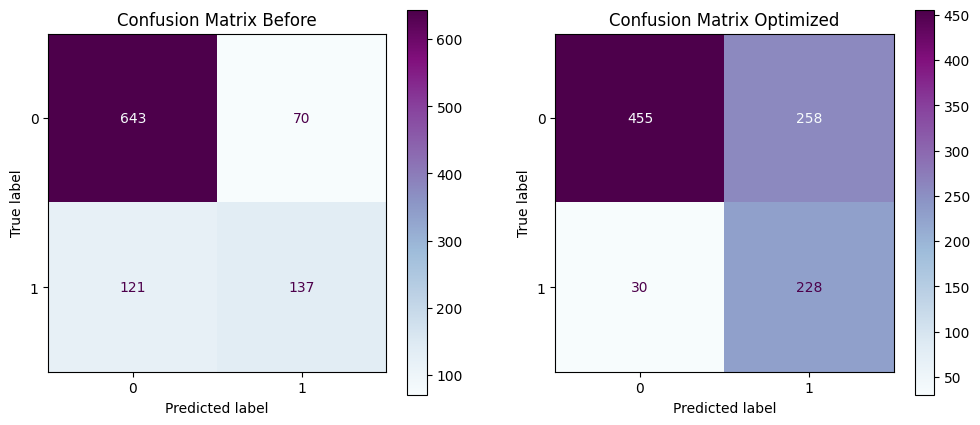

In [214]:
disp_before = ConfusionMatrixDisplay(cm_before)
disp_after = ConfusionMatrixDisplay(cm_after)

fig, axes = plt.subplots(1,2, figsize=(12,5))

axes[0].set_title('Confusion Matrix Before')
axes[1].set_title('Confusion Matrix Optimized')
disp_before.plot(ax=axes[0], cmap='BuPu')
disp_after.plot(ax=axes[1], cmap='BuPu')

In [218]:
# Assuming 'grid' is your GridSearchCV object and it's already fit
best_model = gridsearch.best_estimator_

# Get feature names from the transformer
feature_names = best_model.named_steps['preprocessing'].get_feature_names_out()

# Get coefficients from the logistic regression model
coefs = best_model.named_steps['modeling'].coef_[0]

# Pair feature names with coefficients
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': coefs})

# Sort by the absolute values of the coefficients
feature_importances['abs_importance'] = feature_importances['importance'].abs()
feature_importances = feature_importances.sort_values(by='abs_importance', ascending=False)

# Now the DataFrame 'feature_importances' no longer has the 'importance' column
pd.DataFrame(feature_importances)

,feature,importance,abs_importance
12,ordinal__Contract,1.019523,1.019523
13,pipe_line__tenure,-0.668325,0.668325
5,onehot__InternetService_Fiber optic,0.627038,0.627038
14,pipe_line__MonthlyCharges,0.234136,0.234136
11,onehot__PaperlessBilling_Yes,0.060373,0.060373
1,onehot__OnlineSecurity_No internet service,0.000000,0.000000
0,onehot__Dependents_Yes,0.000000,0.000000
6,onehot__InternetService_No,0.000000,0.000000
4,onehot__OnlineBackup_Yes,0.000000,0.000000
3,onehot__OnlineBackup_No internet service,0.000000,0.000000


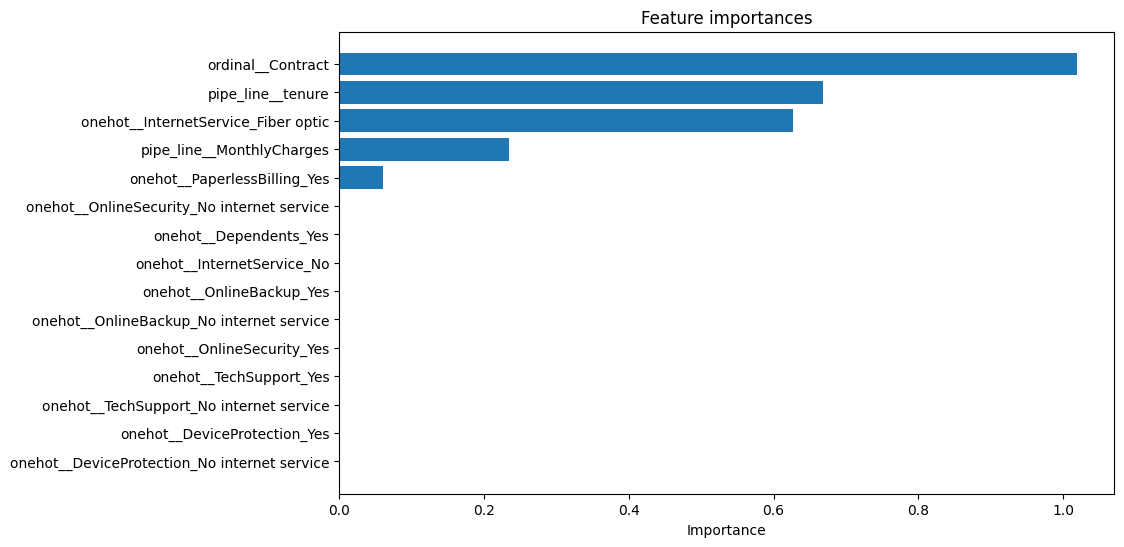

In [219]:
top_features = feature_importances

plt.figure(figsize=(10, 6))
plt.barh(top_features['feature'], top_features['abs_importance'], align='center')
plt.xlabel("Importance")
plt.title("Feature importances")
plt.gca().invert_yaxis()  # Reverse the order of the features
plt.show()

# **Conclusion**

In [39]:
from sklearn.metrics import classification_report, confusion_matrix


report_tuned = classification_report(y_test, y_pred_after)

print('Classification Report after Tuned Logitic Regression : \n', report_tuned)

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       0.94      0.64      0.76       713
           1       0.47      0.88      0.61       258

    accuracy                           0.70       971
   macro avg       0.70      0.76      0.69       971
weighted avg       0.81      0.70      0.72       971



Metric utama yang akan kita gunakan adalah `Recall`. Oleh karena itu, Model ini sangat cocok digunakan Jika tujuan utama adalah meminimalkan kehilangan pelanggan

Setelah melakukan cross validation dan hyper parameter tuning, Model ini Mendapatkan score predict sebelum tuning sebesar 53% dan Mendapatkan score predict setelah tuning sebesar 88% dengan metric Recall. Model akhir yang terpilih untuk digunakan adalah Logistic Regression dengan parameter C : 0.01, Class Weight : Balanced, Penalty : l2, dan Solver : saga.

Berdasarkan hasil classification report dari model dengan metric yang digunakan adalah Recall, kita dapat menyimpulkan bahwa saat model ini digunakan model ini dapat mengetahui 64% pelanggan yang tidak churn dan dapat mengetahui 88% pelanggan yang akan churn. jika dilihat dari precisionnya, kemungkin model kita memprediksi pelanggan yang churn dengan benar adalah 47%. maka masih ada sekitar 41% pelanggan yang diprediksi churn padahal aktualnya tidak churn.

Jika kita lihat kembali pada metric evaluation diatas, FN memberikan dampak yang lebih merugikan dibanding FP. menurut sumber(https://sci-hub.se/https://doi.org/10.1016/j.jretconser.2017.10.007), biaya untuk retensi pelanggan adalah $50 dan biaya untuk pelanggan yang cenderung churn/biaya untuk mendapatkan pelanggan baru 5x lebih banyak dari biaya retensi pelanggan yaitu sebesar $250. Pelanggan yg kita miliki saat ini adalah 4853 dengan pelanggan yang cenderung churn sebanyak 1288 dan pelanggan yang cenderung stay/tidak churn sebanyak 3565. Jumlah pelanggan yang terdapat pada confusion metrix adalah 971 atau 1/5 dari total pelanggan.

Oleh karena itu, kita akan menghitung biaya yang dikeluarkan dan membandingkan biaya sebelum menggunakan model dengan setelah menggunakan model. Berikut adalah hitungannya:
1. **Biaya yang dikeluarkan sebelum menggunakan model**
- Rumus:
- pengeluaran untuk pelanggan yang cenderung churn(pc) = jumlah pelanggan yang cenderung churn * biaya untuk pelanggan yang cenderung churn
- pengeluaran untuk pelanggan yang cenderung tidak churn(pnc) = jumlah pelanggan yang cenderung tidak churn * biaya retensi pelanggan
- total = pnc + pc
- jawaban:
- pc = 1288 * 250 = 322.000
- pnc = 3565 * 50 = 178.250
- total = 322.000 + 178.250 = $500.250

2. **Biaya yang dikeluarkan setelah menggunakan model**
- Rumus:
- pelanggan FP dari confusion metrix = 258
- pelanggan FN dari confusion metrix = 30
- jika dihitung biaya pengeluarannya adalah:
- FP = jumlah FP * biaya retensi pelanggan
- FN = jumlah FN * biaya untuk pelanggan yang cenderung churn
- total = FP + FN
- Jawaban:
- FP = 258 * 50 = 12.900
- FN = 30 * 250 = 7.500
- total = 12.900 + 7.500 = $20.400

Karena Jumlah pelanggan yang terdapat pada confusion metrix adalah 1/5 dari total pelanggan. maka total tersebut akan dikalikan 5. Jadi hasilnya adalah $102.000.

3. **Selisih biaya dari sebelum menggunakan model dan setelah menggunkan model**
- Rumus:
- selisih = total sebelum menggunakan model - total setelah menggunkan model
- selisih = $500.250 - $102.000
- selisih = $398.250

**PERBANDINGAN PENGGUNAAN MACHINE LEARNING**
- Sebelum menggunakan Machine Learning: perusahaan mengeluarkan biaya sebesar $500.250
- Setelah menggunakan Machine Learning: perusahaan hanya mengeluarkan biaya sebesar $398.250

Dapat disimpulkan bahwa Machine Learning dengan menggunakan algoritma Logistic Regression berhasil mengefisiensi biaya pengeluaran sebesar $102.000 atau sekitar 20%.

**Faktor yang mempengaruhi Customer Churn**

Berdasarkan Feature Importance, Faktor utama yang mempengaruhi prediksi Customer Churn secara berurutan adalah:
1. **Contract**: Fitur ini tampaknya sangat mempengaruhi perilaku pelanggan karena koefiennya mencapai angka 1.0. Jika dilihat dari Analisis  Data diatas, Pelanggan bulanan tampaknya lebih mungkin untuk churn daripada pelanggan dengan kontrak tahunan.
2. **Tenure**: Fitur ini menjadi fitur ke-2 yang paling mempengaruhi perilaku pelanggan karena koefiennya mencapai angka lebih dari 0.6. Jika dilihat dari Analisis  Data diatas untuk pelanggan yang cenderung churn, semakin baru customer berlangganan semakin besar kemungkinan Customer akan churn.
3. **InternetService_Fiber optic**: Fitur ini menjadi fitur ke-3 yang paling mempengaruhi perilaku pelanggan karena koefiennya mencapai angka lebih dari 0.6 juga. Jika dilihat dari tabel Feature Importance, Pelanggan yang menggunakan Fiber optic paling berpengaruh untuk churn dibandingkan Pelanggan yang menggunakan InternetService yang lain.

# **Recommedation**

**Rekomendasi Bisnis berdasarkan Faktor yang mempengaruhi Customer Churn:**
1. **Contract**: Karena Contract bulanan tampaknya lebih mungkin untuk churn, Maka perusahaan harus mempertimbangkan strategi untuk mendorong pelanggan memilih kontrak jangka panjang. Ini dapat mencakup menawarkan diskon atau fitur khusus yang hanya tersedia dengan kontrak jangka panjang.
2. **Tenure**: Karena semakin baru customer berlangganan semakin besar kemungkinan Customer akan churn, Maka upaya retensi harus ditingkatkan untuk pelanggan baru, dan program loyalitas/penghargaan dapat diterapkan untuk mendorong pelanggan untuk tinggal lebih lama.
3. **InternetService_Fiber optic**: Karena Pelanggan yang menggunakan Fiber optic paling berpengaruh untuk churn dibandingkan Pelanggan yang menggunakan InternetService yang lain, ini dapat memberikan dampak negatif pada perusahaan. Jadi, perusahaan dapat mengidentifikasi masalah utama dan melakukan perbaikan yang diperlukan untuk meningkatkan retensi pelanggan.

**Rekomendasi Untuk Model agar bisa dimaksimalkan:**
1. Karena Data ini imbalance, Memperbanyak variasi Data Churn  (Terutama Data dengan status Churn yes) menjadi salah satu hal yang disarankan. Dengan memperbanyak data, membuat data menjadi heterogen sehingga tidak terjadi kecenderungan terhadap salah satu target ketika dilakukan prediksi oleh model
2. Menambahkan fitur2 atau kolom2 baru yang kemungkinan bisa berhubungan. hal tersebut akan Menambah Informasi yang Tersedia untuk Model dan Mengurangi Bias atau Missing Information akan Meningkatkan Akurasi Prediksi dari model.